In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [70]:
df_titles = pd.read_csv("titles.csv")

df_titles.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

<AxesSubplot:xlabel='type', ylabel='runtime'>

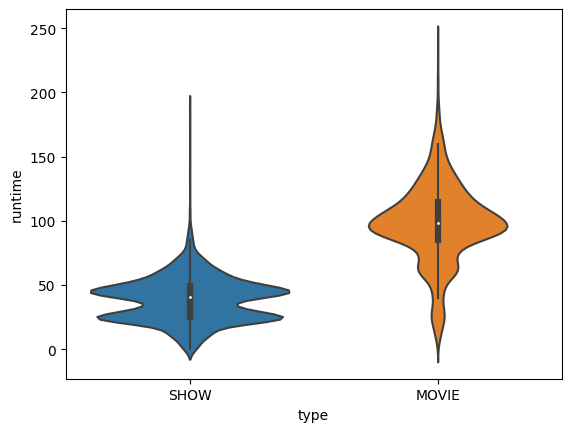

In [6]:
#Analisis de Tipo vs Duracion

sns.violinplot(x=df_titles['type'], y=df_titles['runtime'])

<AxesSubplot:xlabel='imdb_score', ylabel='runtime'>

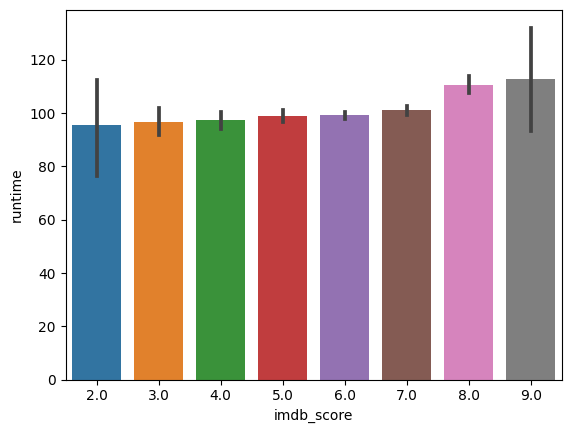

In [54]:
#Analisis de Puntaje imdb vs duracion en peliculas


puntajes = df_titles.round({'imdb_score': 0, 'tmdb_score':0})

peliculas = puntajes[puntajes['type'] =='MOVIE']

sns.barplot(x='imdb_score', y='runtime', data=peliculas)


<AxesSubplot:xlabel='imdb_score', ylabel='runtime'>

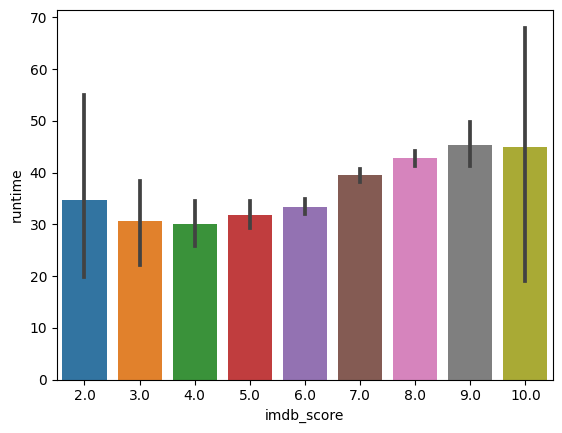

In [50]:
#Analisis de Puntaje imdb vs duracion en series

series = puntajes[puntajes['type'] =='SHOW']
sns.barplot(x='imdb_score', y='runtime', data=series)

De las duraciones de las peliculas y series vs su puntuacion, podriamos decir que:

En el caso de las peliculas, las mejor puntuadas poseen una duracion mayor mientras que las peliculas cortas suelen tener puntuaciones inferiores.

Por otro lado, en las series, es mas marcado que las que poseen capitulos mas largos poseen mejor puntuacion, aunque se aprecian ciertas excepciones.

In [68]:
#Analisis de certificacion por año.

#Me fijo con un describe, de que año son la mayoria de las producciones propuestas 
producciones = df_titles
producciones['release_year'] = producciones['release_year'].astype(int)
producciones.describe()


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


<AxesSubplot:xlabel='age_certification', ylabel='release_year'>

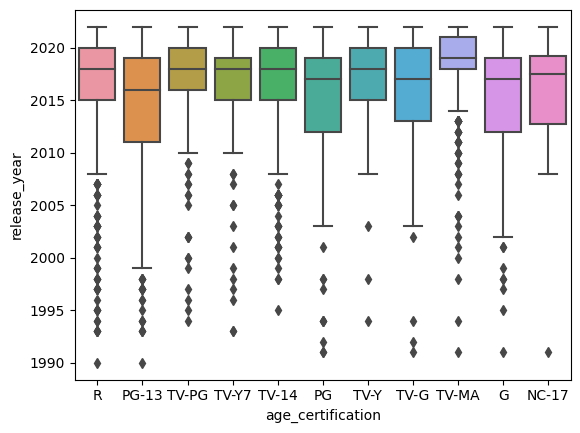

In [69]:
#Debido a que el 75% de las producciones son luego de 2016, extenderse demasiado en la fecha es innecesario.
#Es por eso que tomo luego de 1990

producciones = producciones[producciones['release_year'] >= 1990]

sns.boxplot(x=producciones['age_certification'], y=producciones['release_year'])

En el ultimo puede verse que en el ultimo tiempo hubo un incremento significativo en la creacion de contenido TV-MA dirigido a publico maduro, mientras que las PG-13 para mayores de 13 años tuvieron su apogeo luego del 2010.